<a href="https://colab.research.google.com/github/AntonioBMesquita/Challenge-Telecomx-2/blob/main/TelecomX_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Telecom X Parte 2

##

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

In [83]:
dados = pd.read_csv('https://raw.githubusercontent.com/AntonioBMesquita/Challenge-Telecomx-2/refs/heads/main/TelecomX_Dados_Tratados.csv')
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [84]:
dados.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.Diary
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [85]:
dados.describe(include='object')

,customerID,gender,InternetService,Contract,PaymentMethod
count,7043,7043,7043,7043,7043
unique,7043,2,3,3,4
top,9995-HOTOH,Male,Fiber optic,Month-to-month,Electronic check
freq,1,3555,3096,3875,2365


In [86]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 


## Visualização gráfica dos dados

In [87]:
evasao = dados['Churn'].value_counts().reset_index()
evasao.columns = ['Churn', 'Count']
evasao

,Churn,Count
0,0,5174
1,1,1869


/tmp/ipython-input-3040820484.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='Count', data=evasao, palette='tab10')


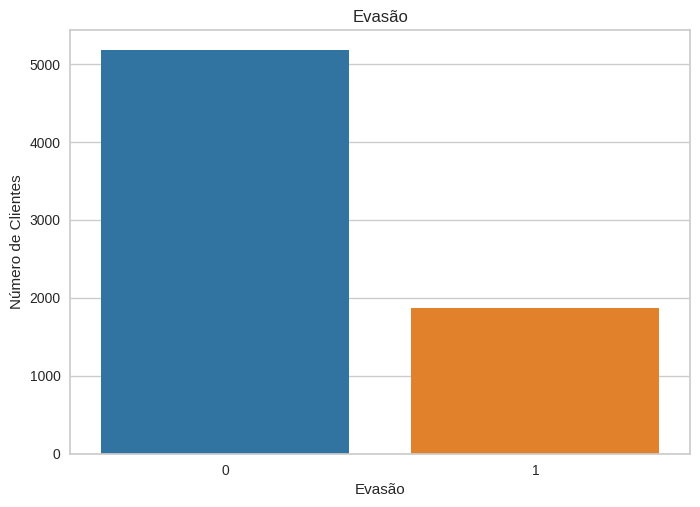

In [88]:
sns.barplot(x='Churn', y='Count', data=evasao, palette='tab10')
plt.title('Evasão')
plt.xlabel('Evasão')
plt.ylabel('Número de Clientes')
plt.show()

In [89]:
tipo_internet = dados.groupby('InternetService')['Churn'].value_counts().reset_index()
tipo_internet.columns = ['InternetService', 'Churn', 'Count']
tipo_internet

,InternetService,Churn,Count
0,DSL,0,1962
1,DSL,1,459
2,Fiber optic,0,1799
3,Fiber optic,1,1297
4,No,0,1413
5,No,1,113


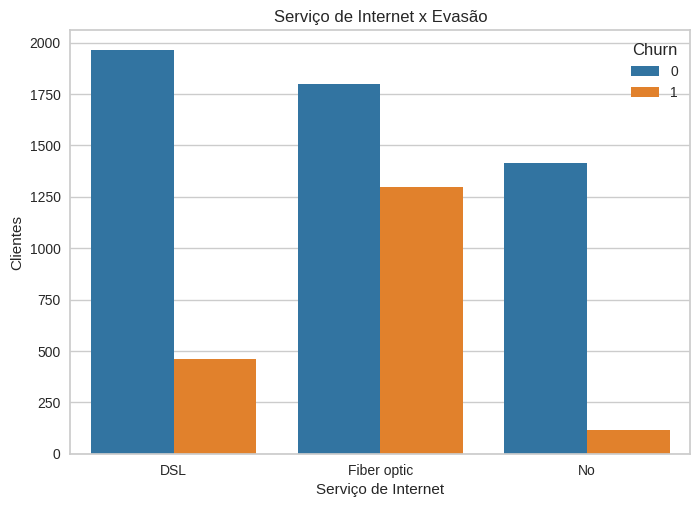

/tmp/ipython-input-2843500601.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='InternetService', data=dados, palette='tab10')


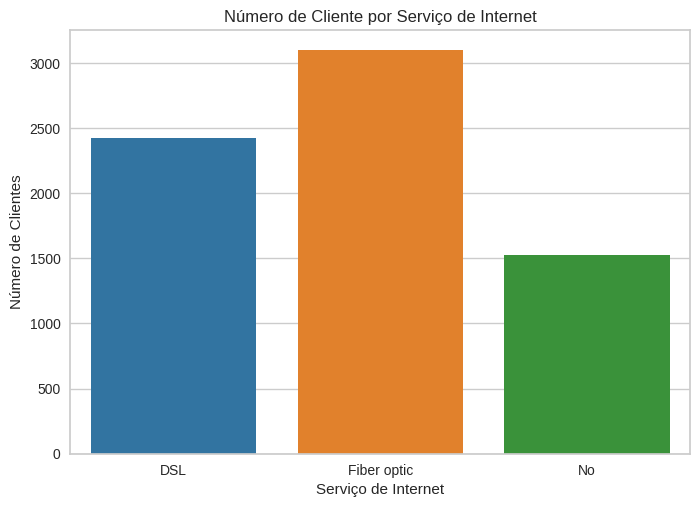

In [90]:
sns.barplot(x='InternetService', y='Count', hue='Churn', data=tipo_internet, palette='tab10')
plt.title('Serviço de Internet x Evasão')
plt.xlabel('Serviço de Internet')
plt.ylabel('Clientes')
plt.show()


sns.countplot(x='InternetService', data=dados, palette='tab10')
plt.title('Número de Cliente por Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.show()


In [91]:
tipo_contrato = dados.groupby('Contract')['Churn'].value_counts().reset_index()
tipo_contrato.columns = ['Contract', 'Churn', 'Count']
tipo_contrato

,Contract,Churn,Count
0,Month-to-month,0,2220
1,Month-to-month,1,1655
2,One year,0,1307
3,One year,1,166
4,Two year,0,1647
5,Two year,1,48


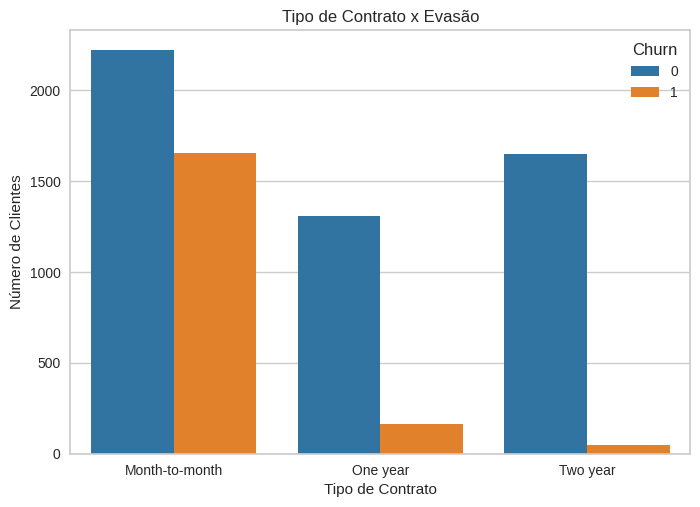

/tmp/ipython-input-3003838098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contract', data=dados, palette='tab10')


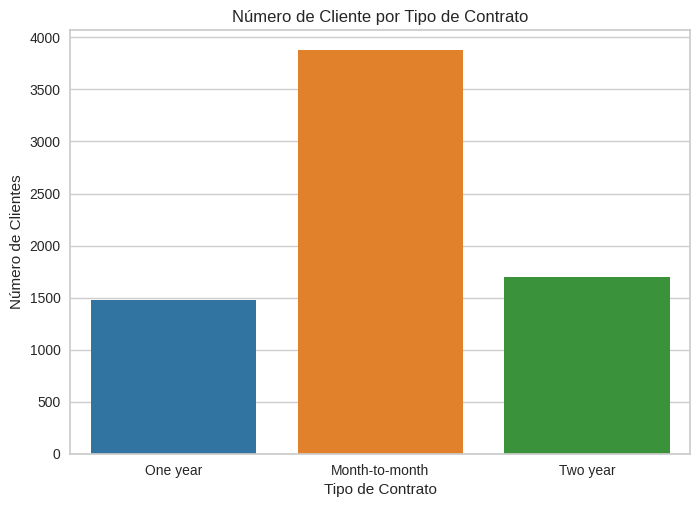

In [92]:
sns.barplot(x='Contract', y='Count', hue='Churn', data=tipo_contrato, palette='tab10')
plt.title('Tipo de Contrato x Evasão')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()


sns.countplot(x='Contract', data=dados, palette='tab10')
plt.title('Número de Cliente por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()


In [93]:
tipo_pagamento = dados.groupby('PaymentMethod')['Churn'].value_counts().reset_index()
tipo_pagamento.columns = ['PaymentMethod', 'Churn', 'Count']
tipo_pagamento

,PaymentMethod,Churn,Count
0,Bank transfer (automatic),0,1286
1,Bank transfer (automatic),1,258
2,Credit card (automatic),0,1290
3,Credit card (automatic),1,232
4,Electronic check,0,1294
5,Electronic check,1,1071
6,Mailed check,0,1304
7,Mailed check,1,308


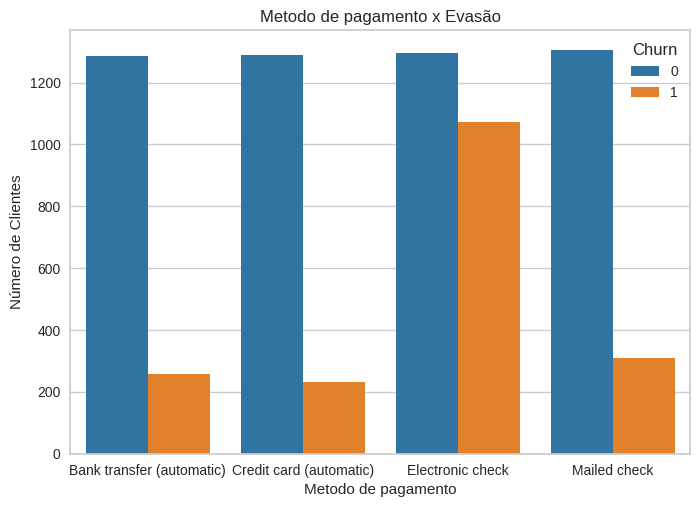

/tmp/ipython-input-1895447693.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMethod', data=dados, palette='tab10')


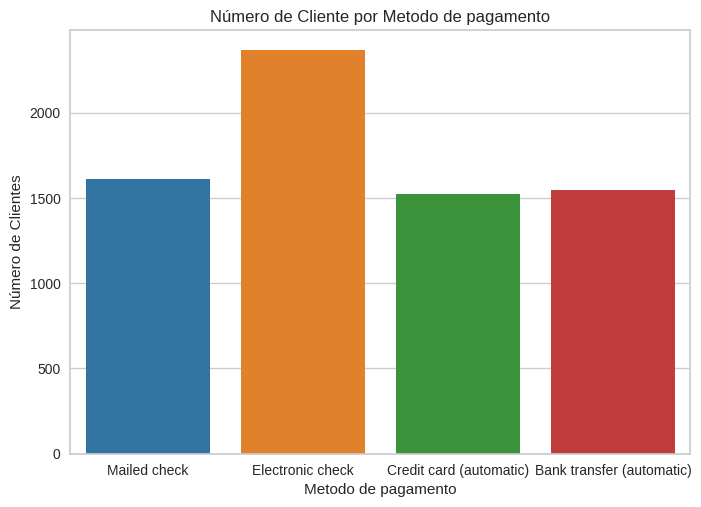

In [94]:
sns.barplot(x='PaymentMethod', y='Count', hue='Churn', data=tipo_pagamento, palette='tab10')
plt.title('Metodo de pagamento x Evasão')
plt.xlabel('Metodo de pagamento')
plt.ylabel('Número de Clientes')
plt.show()


sns.countplot(x='PaymentMethod', data=dados, palette='tab10')
plt.title('Número de Cliente por Metodo de pagamento')
plt.xlabel('Metodo de pagamento')
plt.ylabel('Número de Clientes')
plt.show()


In [95]:
total_gasto = dados.groupby('Charges.Total')['Churn'].value_counts().reset_index()
total_gasto.columns = ['ChargesTotal', 'Churn', 'Count']
total_gasto

,ChargesTotal,Churn,Count
0,0.00,0,11
1,18.80,0,1
2,18.85,0,1
3,18.85,1,1
4,18.90,0,1
...,...,...,...
6693,8564.75,0,1
6694,8594.40,0,1
6695,8670.10,0,1
6696,8672.45,0,1


Text(0.5, 1.0, 'Total Gasto x Evasão')

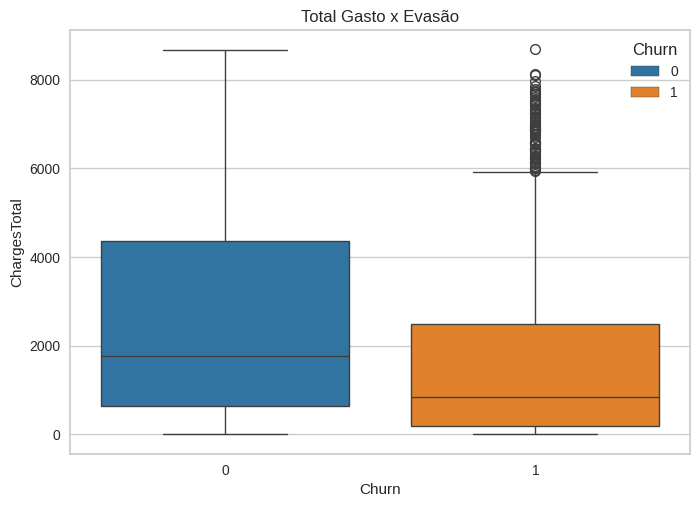

In [96]:
sns.boxplot(total_gasto,x='Churn',y='ChargesTotal',hue='Churn',palette='tab10')
plt.title('Total Gasto x Evasão')

In [97]:
tempo_contrato = dados.groupby('tenure')['Churn'].value_counts().reset_index()
tempo_contrato.columns = ['Tenure', 'Churn', 'Count']
tempo_contrato

,Tenure,Churn,Count
0,0,0,11
1,1,1,380
2,1,0,233
3,2,1,123
4,2,0,115
...,...,...,...
140,70,1,11
141,71,0,164
142,71,1,6
143,72,0,356


Text(0.5, 1.0, 'Tempo de Contrato x Evasão')

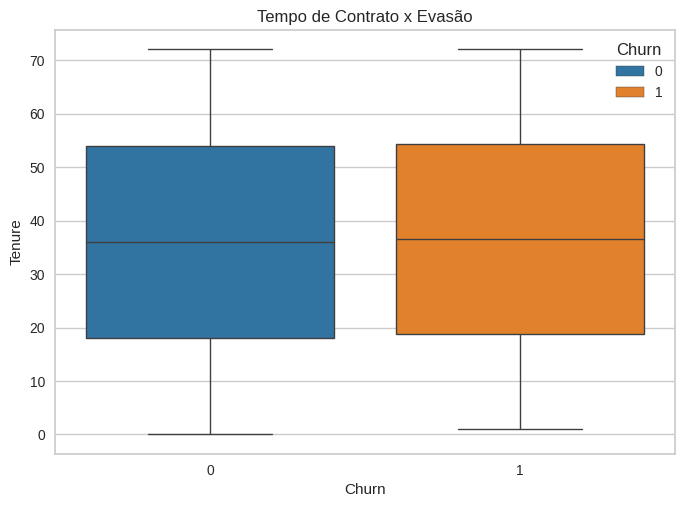

In [98]:
sns.boxplot(tempo_contrato,x='Churn',y='Tenure',hue='Churn',palette='tab10')
plt.title('Tempo de Contrato x Evasão')

##

In [99]:
dados = dados.drop(columns='customerID')

In [100]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


one_hot_encoder = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),
     ['gender','InternetService','Contract','PaymentMethod']
     ),
    remainder='passthrough',
    sparse_threshold=0
)
df_encoded = one_hot_encoder.fit_transform(dados)
df_encoded = pd.DataFrame(df_encoded, columns=one_hot_encoder.get_feature_names_out())

In [101]:
df_encoded

,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Charges.Diary
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.19
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.00
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.46
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.84
7039,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.84
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.68
7041,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.26


In [102]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__gender_Male                              7043 non-null   float64
 1   onehotencoder__InternetService_DSL                      7043 non-null   float64
 2   onehotencoder__InternetService_Fiber optic              7043 non-null   float64
 3   onehotencoder__InternetService_No                       7043 non-null   float64
 4   onehotencoder__Contract_Month-to-month                  7043 non-null   float64
 5   onehotencoder__Contract_One year                        7043 non-null   float64
 6   onehotencoder__Contract_Two year                        7043 non-null   float64
 7   onehotencoder__PaymentMethod_Bank transfer (automatic)  7043 non-null   float64
 8   onehotencoder__PaymentMethod_Credit ca

In [103]:
df_encoded.corr()

,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Charges.Diary
onehotencoder__gender_Male,1.000000,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,...,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,-0.011754,-0.014569,-0.000080,-0.014618
onehotencoder__InternetService_DSL,0.006568,1.000000,-0.640987,-0.380635,-0.065509,0.046795,0.031714,0.025476,0.051438,-0.104418,...,0.321269,0.157884,0.146291,0.313118,0.016274,0.025698,-0.063121,-0.160189,-0.052469,-0.160211
onehotencoder__InternetService_Fiber optic,-0.011286,-0.640987,1.000000,-0.465793,0.244164,-0.076324,-0.211526,-0.022624,-0.050077,0.336410,...,-0.030696,0.165651,0.176049,-0.020492,0.329349,0.322923,0.326853,0.787066,0.361655,0.787091
onehotencoder__InternetService_No,0.006026,-0.380635,-0.465793,1.000000,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,...,-0.333403,-0.381593,-0.380754,-0.336298,-0.415552,-0.418675,-0.321013,-0.763557,-0.375223,-0.763562
onehotencoder__Contract_Month-to-month,-0.003386,-0.065509,0.244164,-0.218639,1.000000,-0.568744,-0.622633,-0.179707,-0.204145,0.331661,...,-0.246679,-0.164172,-0.225662,-0.285241,-0.112282,-0.116633,0.169096,0.060165,-0.444255,0.060235
onehotencoder__Contract_One year,0.008026,0.046795,-0.076324,0.038004,-0.568744,1.000000,-0.289510,0.057451,0.067589,-0.109130,...,0.100162,0.083722,0.102495,0.095775,0.061612,0.064926,-0.051391,0.004904,0.170814,0.004849
onehotencoder__Contract_Two year,-0.003695,0.031714,-0.211526,0.218278,-0.622633,-0.289510,1.000000,0.154471,0.173265,-0.282138,...,0.191773,0.111400,0.165096,0.240824,0.072049,0.073960,-0.147889,-0.074681,0.354481,-0.074710
onehotencoder__PaymentMethod_Bank transfer (automatic),-0.016024,0.025476,-0.022624,-0.002113,-0.179707,0.057451,0.154471,1.000000,-0.278215,-0.376762,...,0.095158,0.087004,0.083115,0.101252,0.046252,0.048652,-0.016332,0.042812,0.185987,0.042785
onehotencoder__PaymentMethod_Credit card (automatic),0.001215,0.051438,-0.050077,0.001030,-0.204145,0.067589,0.173265,-0.278215,1.000000,-0.373322,...,0.115721,0.090785,0.111554,0.117272,0.040433,0.048575,-0.013589,0.030550,0.182915,0.030547
onehotencoder__PaymentMethod_Electronic check,0.000752,-0.104418,0.336410,-0.284917,0.331661,-0.109130,-0.282138,-0.376762,-0.373322,1.000000,...,-0.112338,-0.000408,-0.003351,-0.114839,0.144626,0.137966,0.208865,0.271625,-0.059246,0.271650


## Criação e teste de modelos

### Modelo Dummy

In [104]:
X = df_encoded.drop(columns='remainder__Churn')
y = df_encoded['remainder__Churn']

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7)

In [106]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


modelo_dummy = DummyClassifier()
modelo_dummy.fit(X_train, y_train)
modelo_dummy.score(X_test, y_test)

y_pred_dummy = modelo_dummy.predict(X_test)
acuracia_dummy = accuracy_score(y_test, y_pred_dummy)
print(f"Acurácia: {acuracia_dummy:.4f}")

Acurácia: 0.7350


In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      1553
         1.0       0.00      0.00      0.00       560

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Modelo Linear Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



modelo_linear = LogisticRegression()
modelo_linear.fit(X_train_scaled, y_train)
modelo_linear.score(X_test_scaled, y_test)

y_pred_linear = modelo_linear.predict(X_test_scaled)
acuracia_linear = accuracy_score(y_test, y_pred_linear)
print(f"Acurácia: {acuracia_linear:.4f}")

Acurácia: 0.8060


In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1553
         1.0       0.66      0.55      0.60       560

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



### Modelo KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_scaled, y_train)
modelo_knn.score(X_test_scaled, y_test)

y_pred_knn = modelo_knn.predict(X_test_scaled)
acuracia_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia: {acuracia_knn:.4f}")

Acurácia: 0.7629


In [111]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1553
         1.0       0.55      0.55      0.55       560

    accuracy                           0.76      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.76      0.76      0.76      2113



### Modelo Árvore de decisão

In [112]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier(max_depth=3)
modelo_arvore.fit(X_train, y_train)
modelo_arvore.score(X_test, y_test)

y_pred_arvore = modelo_arvore.predict(X_test)
acuracia_arvore = accuracy_score(y_test, y_pred_arvore)
print(f"Acurácia: {acuracia_arvore:.4f}")

Acurácia: 0.7870


In [113]:
print(classification_report(y_test, y_pred_arvore))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      1553
         1.0       0.68      0.38      0.49       560

    accuracy                           0.79      2113
   macro avg       0.74      0.66      0.68      2113
weighted avg       0.77      0.79      0.76      2113



### Modelo RandomForestClassifier

In [114]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(max_depth=3, class_weight='balanced',random_state=42)
modelo_rf.fit(X_train, y_train)
modelo_rf.score(X_test, y_test)

y_pred_rf = modelo_rf.predict(X_test)
acuracia_rf = accuracy_score(y_test, y_pred_arvore)
print(f"Acurácia: {acuracia_rf:.4f}")

Acurácia: 0.7870


In [115]:
print(classification_report(y_test, y_pred_arvore))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      1553
         1.0       0.68      0.38      0.49       560

    accuracy                           0.79      2113
   macro avg       0.74      0.66      0.68      2113
weighted avg       0.77      0.79      0.76      2113



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


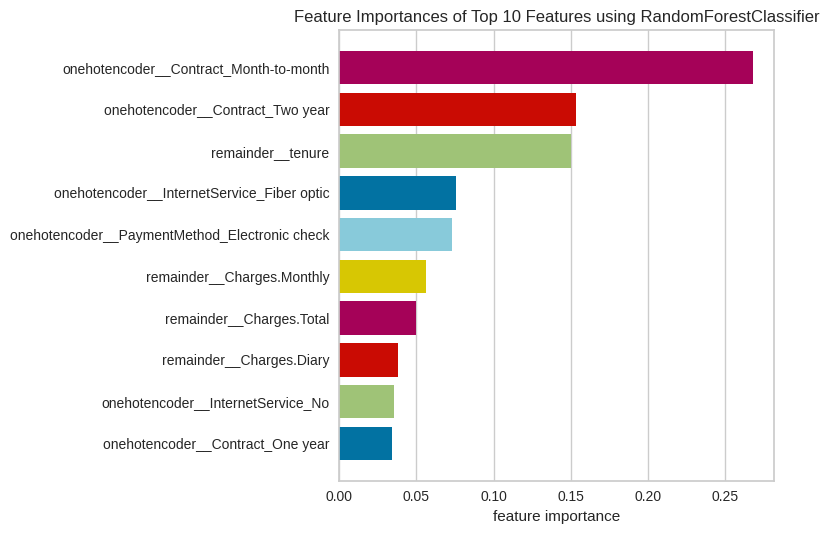

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [116]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(modelo_rf, relative=False, topn=10)
viz.fit(X_train, y_train)
viz.show()

In [117]:
importances = modelo_rf.feature_importances_

feature_importance = pd.DataFrame({'Feature' : X.columns, 'Importances' : importances}).sort_values(by='Importances', ascending=False)
feature_importance.head(10).round(4)

,Feature,Importances
4,onehotencoder__Contract_Month-to-month,0.2683
6,onehotencoder__Contract_Two year,0.1537
14,remainder__tenure,0.1505
2,onehotencoder__InternetService_Fiber optic,0.0759
9,onehotencoder__PaymentMethod_Electronic check,0.0733
24,remainder__Charges.Monthly,0.0562
25,remainder__Charges.Total,0.0495
26,remainder__Charges.Diary,0.0383
3,onehotencoder__InternetService_No,0.0354
5,onehotencoder__Contract_One year,0.0342


### GridSearchCV

In [120]:
from sklearn.model_selection import GridSearchCV


parametros = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [3, 5, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=modelo_rf, param_grid=parametros,scoring='recall',n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [121]:
print(f"Melhores Parâmetros: {grid_search.best_params_}")


print(f"Melhor Recall: {grid_search.best_score_:.4f}")
melhor_modelo_rf = grid_search.best_estimator_

Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 50}
Melhor Recall: 0.8403
